# Question  -plant task

## 1. Lets import all the libraries 

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix,  roc_curve, precision_recall_curve, accuracy_score, roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [121]:
df = pd.read_csv('plantpalm.csv')

In [5]:
df

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44
...,...,...,...,...,...,...,...,...,...
125,01.06.2018,498.2,27.213333,21.6,33.6,165.6,24,820758.9147,1.29
126,01.07.2018,494.7,27.074194,21.2,33.5,154.7,26,882254.2254,1.42
127,01.08.2018,478.8,27.016129,20.4,33.6,127.2,25,829488.8199,1.61
128,01.09.2018,481.1,26.946667,21.0,34.2,180.6,23,792101.0471,1.91


# Exploratory Data Analysis (EDA)

# Need to get a better understanding of the given data. Questions like: 

# How much data do we have? Are there are any missing values? 
# What is the data type of each column?
# What is the distribution of data in each column? Do we see any outliers?

In [9]:
rows,colums = df.shape

print('rows: ',rows)
print('colums: ',colums)

rows:  130
colums:  9


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           130 non-null    object 
 1   SoilMoisture   130 non-null    float64
 2   Average_Temp   130 non-null    float64
 3   Min_Temp       130 non-null    float64
 4   Max_Temp       130 non-null    float64
 5   Precipitation  130 non-null    float64
 6   Working_days   130 non-null    int64  
 7   HA_Harvested   130 non-null    float64
 8   FFB_Yield      130 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.3+ KB


In [13]:
df.isnull().any()

Date             False
SoilMoisture     False
Average_Temp     False
Min_Temp         False
Max_Temp         False
Precipitation    False
Working_days     False
HA_Harvested     False
FFB_Yield        False
dtype: bool

In [15]:
df.dtypes

Date              object
SoilMoisture     float64
Average_Temp     float64
Min_Temp         float64
Max_Temp         float64
Precipitation    float64
Working_days       int64
HA_Harvested     float64
FFB_Yield        float64
dtype: object

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SoilMoisture,130.0,527.646923,57.367844,380.700000,488.625000,538.300000,571.025000,647.3000
Average_Temp,130.0,26.849918,0.651413,25.158065,26.442285,26.930645,27.270726,28.5800
Min_Temp,130.0,21.379231,0.688971,18.900000,21.000000,21.500000,21.800000,22.6000
Max_Temp,130.0,33.851538,1.079638,31.100000,33.100000,33.900000,34.600000,36.0000
Precipitation,130.0,188.980769,80.237210,2.000000,140.300000,182.150000,226.100000,496.1000
Working_days,130.0,24.753846,1.239289,21.000000,24.000000,25.000000,26.000000,27.0000
HA_Harvested,130.0,793404.491565,34440.893854,683431.944400,768966.949100,790036.158050,821989.235250,882254.2254
FFB_Yield,130.0,1.602231,0.281751,1.080000,1.390000,1.585000,1.807500,2.2700


## 3. explore the distributions histotogram on numerical values 


In [27]:
df.columns

Index(['Date', 'SoilMoisture', 'Average_Temp', 'Min_Temp', 'Max_Temp',
       'Precipitation', 'Working_days', 'HA_Harvested', 'FFB_Yield'],
      dtype='object')

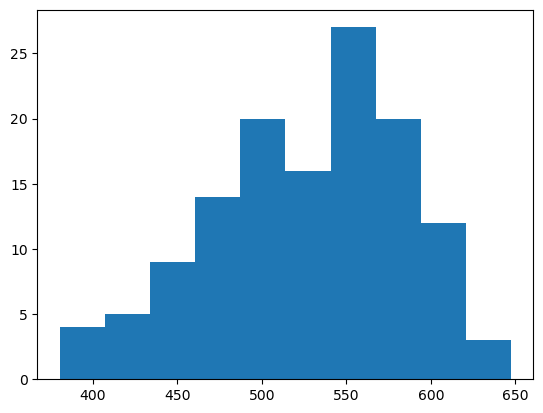

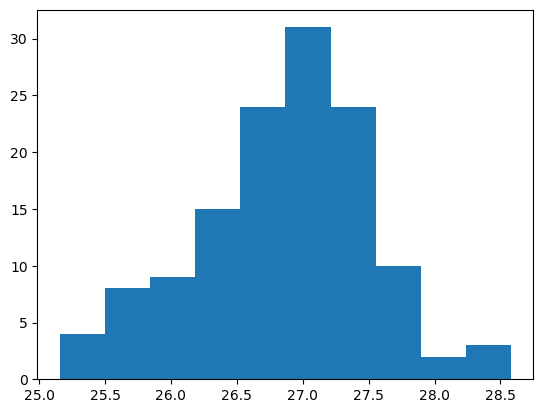

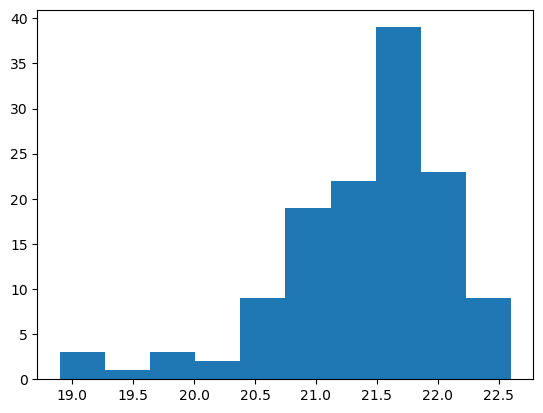

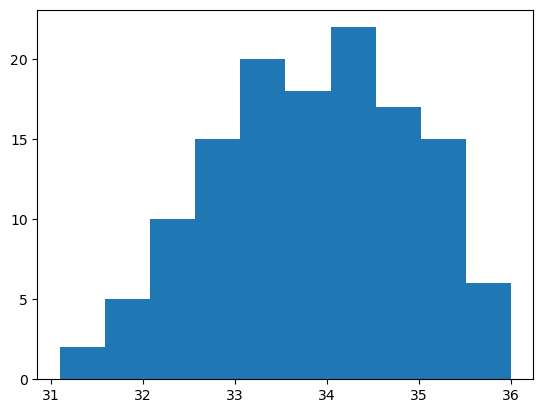

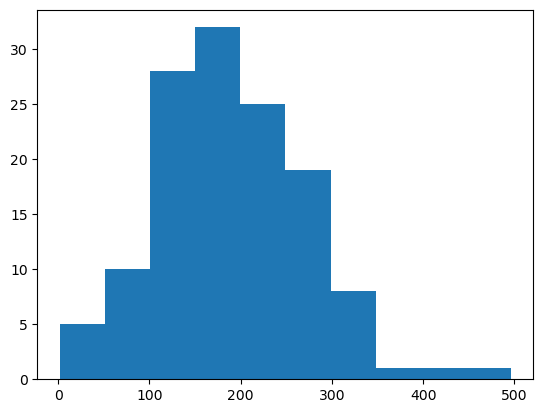

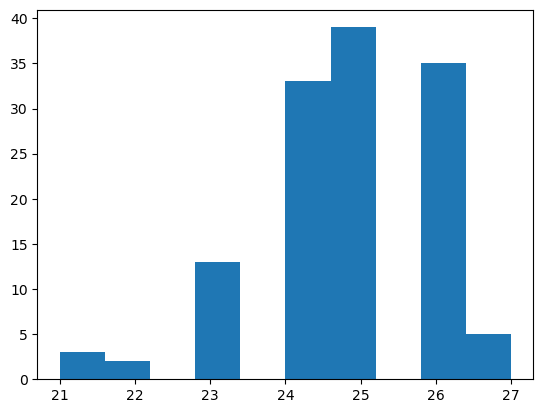

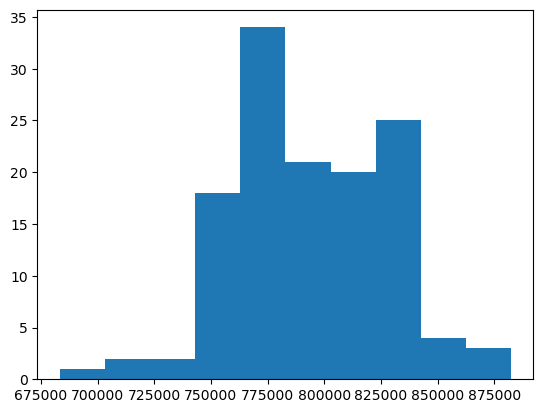

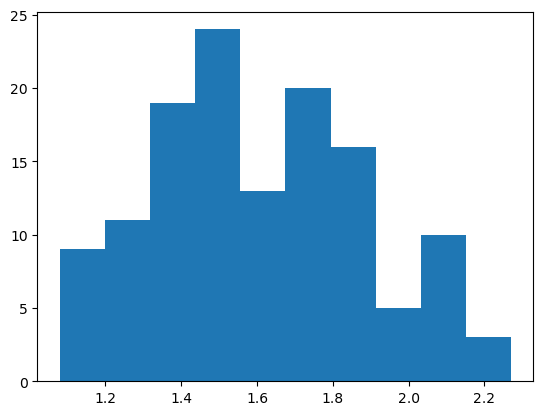

In [33]:
for i in df.columns:
    # print(df[i].dtype)
    if df[i].dtype == 'object' or df[i].dtype == 'str':
        continue
    plt.figure()
    plt.hist(df[i])

## 4. Lets explore the only discrete variable we have called Working_days


## Caluate the counts of working_days and also make a plot of this 


ploting = df.groupby(['Working_days']).count()
ploting

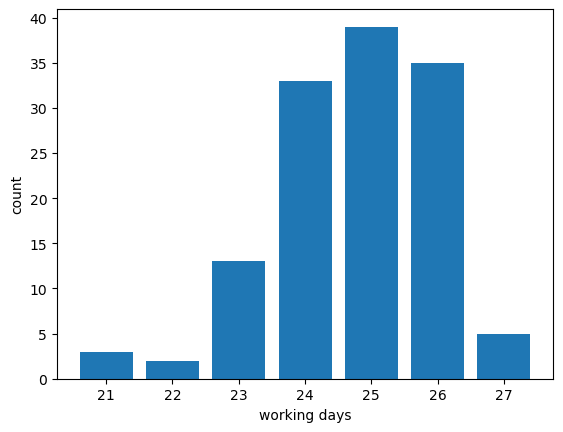

In [67]:
Working_days =[key for key,df in df.groupby('Working_days')]
plt.bar(Working_days,df.groupby('Working_days').count()['Date'])
plt.xlabel('working days')
plt.ylabel('count')
# plt.yticks(df.groupby('Working_days').count()['Date'])
plt.xticks(Working_days)
plt.show()

# Data distribution

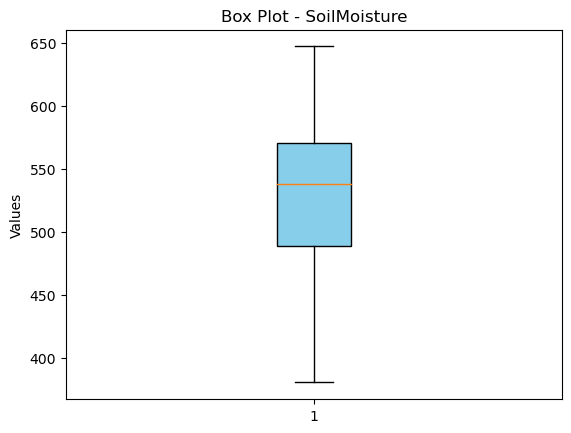

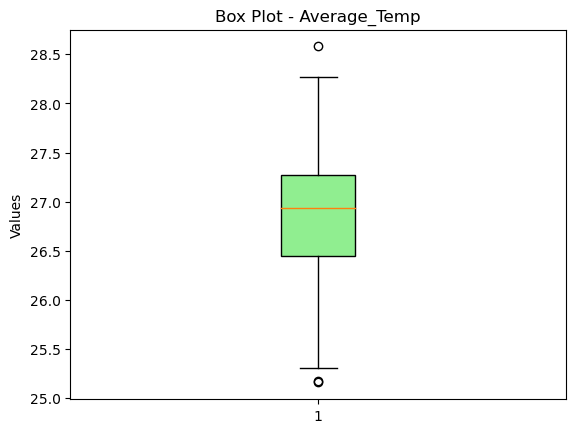

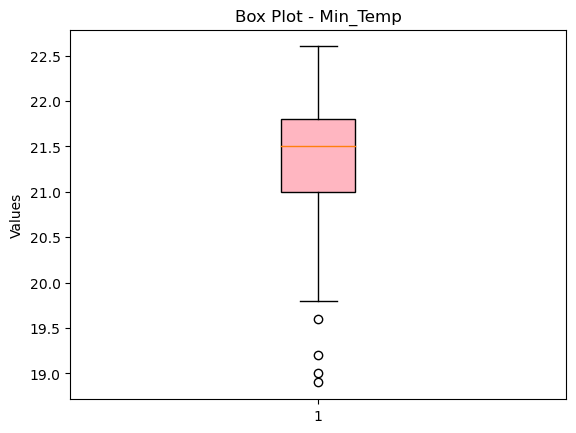

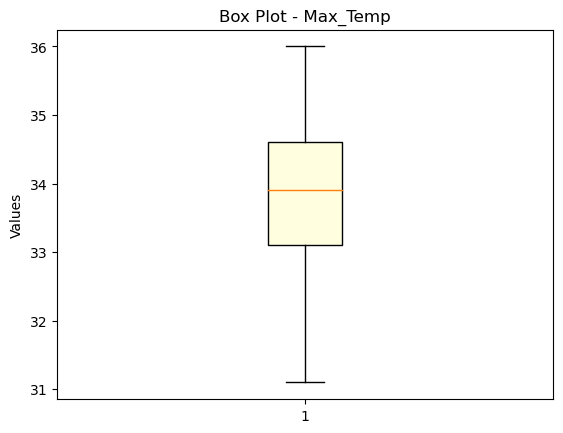

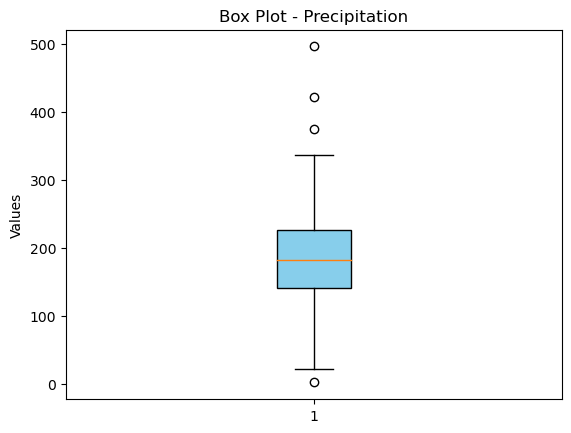

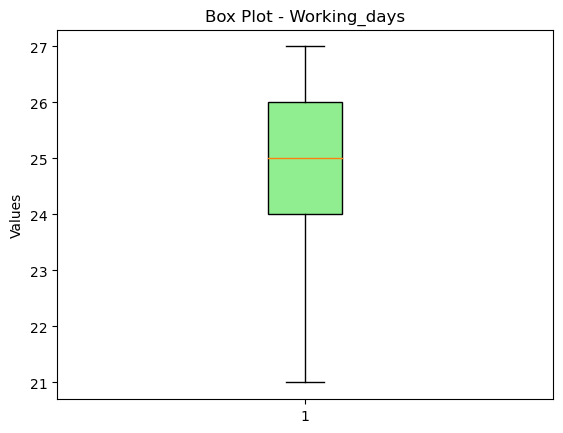

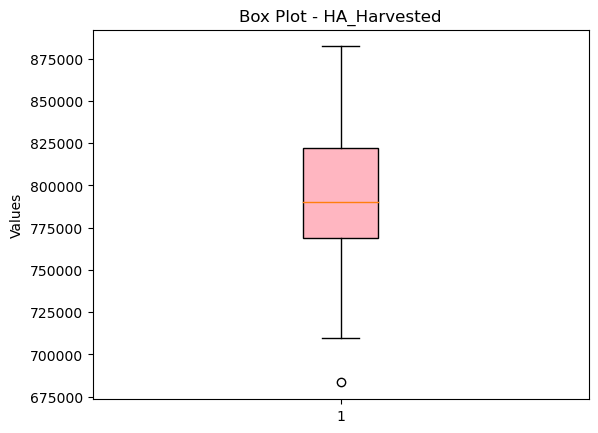

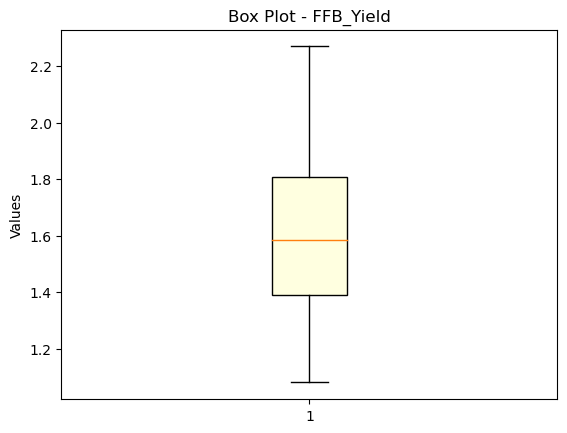

In [69]:
numeric_columns = df.select_dtypes(include=[np.number])

# Define custom colors for the box plots
colors = ['skyblue', 'lightgreen', 'lightpink', 'lightyellow']

# Create a box plot for each numeric column with custom colors
for i, column in enumerate(numeric_columns):
    plt.figure()
    plt.boxplot(df[column].dropna(), patch_artist=True, boxprops=dict(facecolor=colors[i % len(colors)]))
    plt.title('Box Plot - {}'.format(column))
    plt.ylabel('Values')
    plt.show()

## 6. Explore relationships between the FFB Yield and other features - Scatter/Pair Plots.


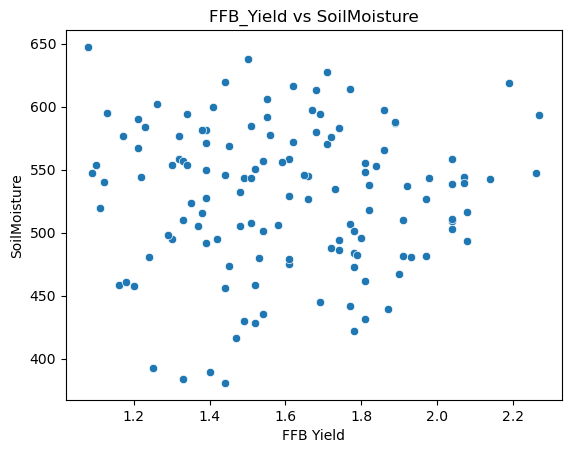

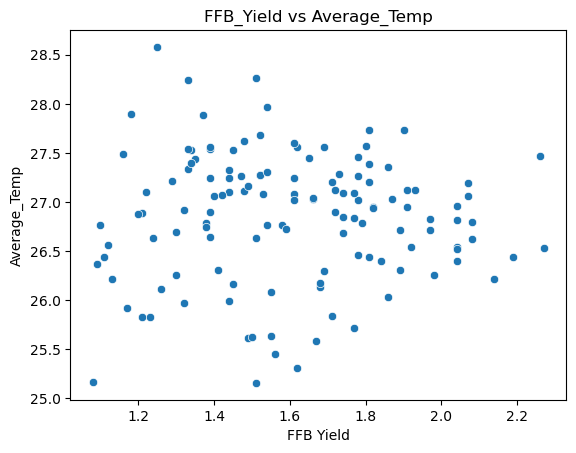

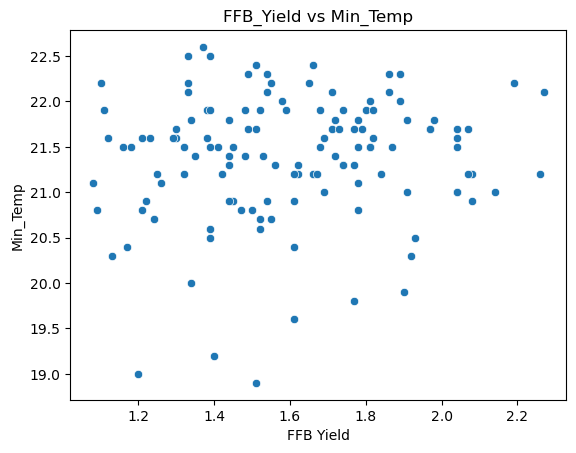

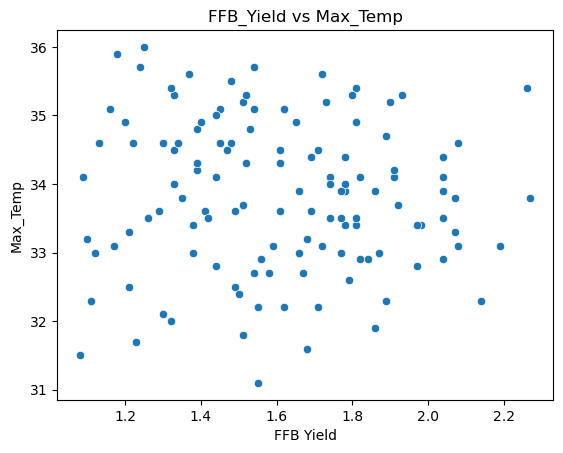

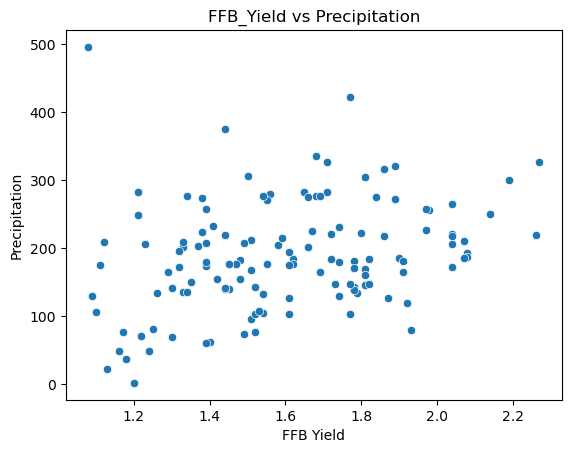

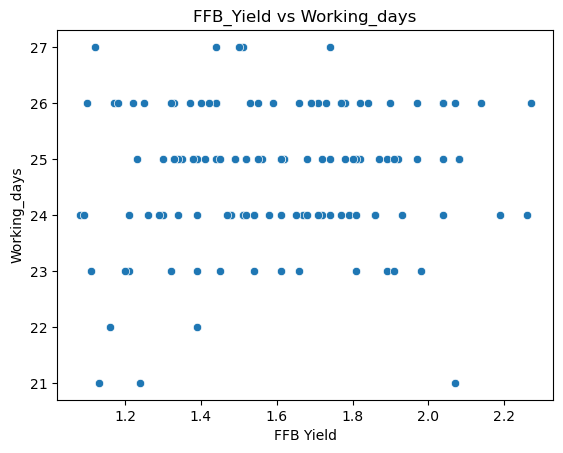

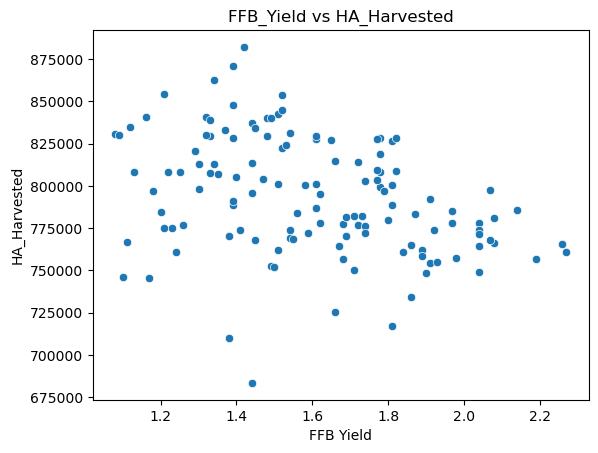

In [74]:
numeric_columns = df.select_dtypes(include=[np.number])
numeric_columns.drop('FFB_Yield', axis = 1, inplace = True)

for col in numeric_columns:
    sns.scatterplot(x='FFB_Yield', y=col, data=df)
    plt.title(('FFB_Yield vs {}'.format(col)))
    plt.xlabel('FFB Yield')
    plt.ylabel(col)
    plt.show()


## 7. Look for correlations among the features and also with the FFB_Yield, our target variable. 

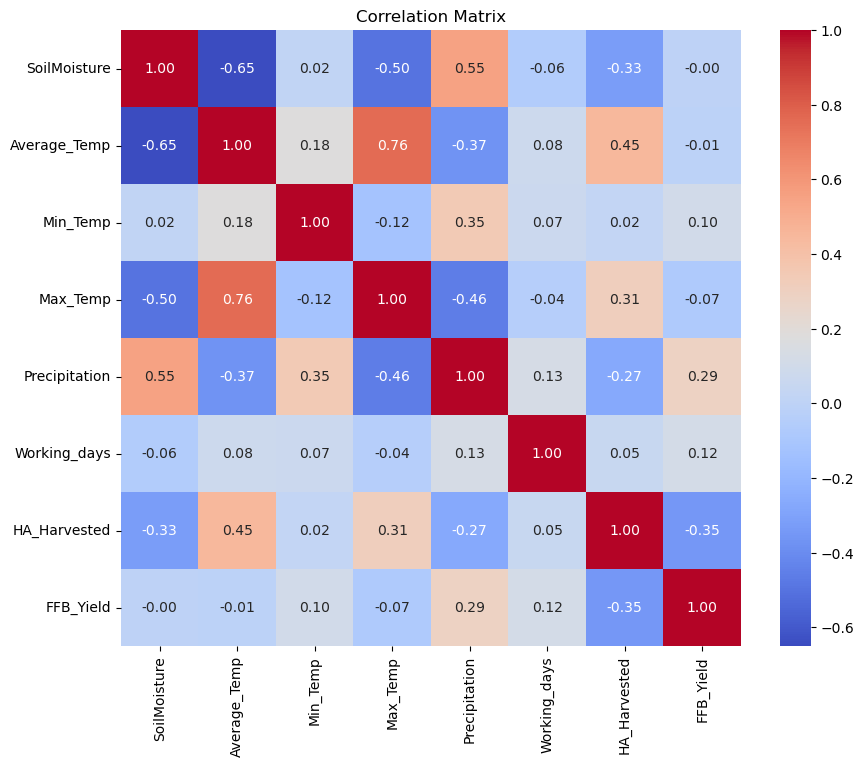

Correlation with FFB Yield:
Precipitation    0.289604
Working_days     0.116364
Min_Temp         0.103830
SoilMoisture    -0.003183
Average_Temp    -0.005494
Max_Temp        -0.071201
HA_Harvested    -0.350222
Name: FFB_Yield, dtype: float64


In [75]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Correlation with FFB Yield
correlation_ffb = correlation_matrix['FFB_Yield'].drop('FFB_Yield')
correlation_ffb = correlation_ffb.sort_values(ascending=False)

# Print correlation with FFB Yield
print('Correlation with FFB Yield:')
print(correlation_ffb)


# 8. Apply four different machine learning models with its evlauations through random splitting and through K=3 fold (cross validation) 

In [139]:
df = pd.read_csv('plantpalm.csv')

In [146]:
np.sort(df.FFB_Yield.unique())

array([1.08, 1.09, 1.1 , 1.11, 1.12, 1.13, 1.16, 1.17, 1.18, 1.2 , 1.21,
       1.22, 1.23, 1.24, 1.25, 1.26, 1.29, 1.3 , 1.32, 1.33, 1.34, 1.35,
       1.37, 1.38, 1.39, 1.4 , 1.41, 1.42, 1.44, 1.45, 1.47, 1.48, 1.49,
       1.5 , 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.58, 1.59, 1.61, 1.62,
       1.65, 1.66, 1.67, 1.68, 1.69, 1.71, 1.72, 1.73, 1.74, 1.77, 1.78,
       1.79, 1.8 , 1.81, 1.82, 1.84, 1.86, 1.87, 1.89, 1.9 , 1.91, 1.92,
       1.93, 1.97, 1.98, 2.04, 2.07, 2.08, 2.14, 2.19, 2.26, 2.27])

In [134]:
X = df.drop(['FFB_Yield','Date'],axis=1)
# X = X.drop('Date',axis=1,inplace=True)
y = df['FFB_Yield'] 

In [135]:
y.head()

0    1.62
1    1.45
2    1.56
3    1.39
4    1.44
Name: FFB_Yield, dtype: float64

In [136]:
df.head(5)

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44


In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(91, 7) (39, 7)


In [ ]:
df.unique

In [ ]:
from sklearn.linear_model import LinearRegression




In [138]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)

y_pred=knn.predict(X_test)

print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",knn.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

ValueError: Unknown label type: 'continuous'